In [1]:
### ValDXer testing
import os
os.environ['HDXER_PATH'] = '/home/alexi/Documents/HDXer'


In [2]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange')
settings.replicates = 2
settings.gamma_range = (1,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.stride = 1000 
settings.split_mode = 'R'
settings.HDXer_stride = 1
settings.RW_do_reweighting = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange0
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange1
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange2
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange3
Experiment name test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange already exists. Attempting to change name to test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange4

In [3]:
pdb_path = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein.pdb"

with open(pdb_path, 'r') as f:
    pdb = f.readlines()
    newlines = []
    for line in pdb:
        if line.startswith('ATOM'):
            # replace index 26 with " "
            line = line[:26] + " " + line[27:]

        newlines.append(line)

with open('bpti-protein.pdb', 'w') as f:
    f.writelines(newlines)

In [4]:
pdb[2][26]


'A'

In [5]:
import os
print(os.getenv('HDXER_PATH'))


/home/alexi/Documents/HDXer


In [6]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [7]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [8]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"



In [9]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [10]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4


In [11]:
print(VDX.rates)

                                               rates     calc_name
0  {3: 917.89750993, 4: 481.71945087, 5: 5161.716...  Experimental


In [12]:
print(VDX.paths)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  


In [13]:
SHAW_dir = "/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein"

dir_list = os.listdir(SHAW_dir)

dcd_list = [i for i in dir_list if i.endswith(".dcd")]
# remove any with small in name
dcd_list = [i for i in dcd_list if not "_str" in i]

dcd_list.sort()
print(dcd_list)
print(len(dcd_list))

['bpti-protein-000.dcd', 'bpti-protein-001.dcd', 'bpti-protein-002.dcd', 'bpti-protein-003.dcd', 'bpti-protein-004.dcd', 'bpti-protein-005.dcd', 'bpti-protein-006.dcd', 'bpti-protein-007.dcd', 'bpti-protein-008.dcd', 'bpti-protein-009.dcd', 'bpti-protein-010.dcd', 'bpti-protein-011.dcd', 'bpti-protein-012.dcd', 'bpti-protein-013.dcd', 'bpti-protein-014.dcd', 'bpti-protein-015.dcd', 'bpti-protein-016.dcd', 'bpti-protein-017.dcd', 'bpti-protein-018.dcd', 'bpti-protein-019.dcd', 'bpti-protein-020.dcd', 'bpti-protein-021.dcd', 'bpti-protein-022.dcd', 'bpti-protein-023.dcd', 'bpti-protein-024.dcd', 'bpti-protein-025.dcd', 'bpti-protein-026.dcd', 'bpti-protein-027.dcd', 'bpti-protein-028.dcd', 'bpti-protein-029.dcd', 'bpti-protein-030.dcd', 'bpti-protein-031.dcd', 'bpti-protein-032.dcd', 'bpti-protein-033.dcd', 'bpti-protein-034.dcd', 'bpti-protein-035.dcd', 'bpti-protein-036.dcd', 'bpti-protein-037.dcd', 'bpti-protein-038.dcd', 'bpti-protein-039.dcd', 'bpti-protein-040.dcd', 'bpti-protein-0

In [14]:
sim_name = "BPTI_SHAW"
top_name = "bpti-protein_noalt.pdb"
top_path = os.path.join(SHAW_dir, top_name)
reps = len(dcd_list)
# reps =100

traj_paths = [os.path.join(SHAW_dir, i) for i in dcd_list[:reps]]
print(top_path)
print(traj_paths)


# VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein_noalt.pdb
['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/ale

In [15]:
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter  # Import DCDWriter directly

small_traj_paths = []

for rep in range(len(traj_paths)):
    traj = traj_paths[rep]
    u = mda.Universe(top_path, traj)
    print(u.trajectory.n_frames)

    # sample by stride settings.stide

    small_traj_name = traj.replace(".dcd", f"_str{settings.stride}.dcd")

    # Create an AtomGroup from the Universe's selection
    ag = u.select_atoms('all')

    # write traj
    with DCDWriter(small_traj_name, ag.n_atoms) as writer:
        for ts in u.trajectory[::settings.stride]:
            writer.write(ag)

    small_traj_paths.append(small_traj_name)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


10000
10000
10000
10000


10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
1000

In [16]:
print((traj_paths))

['/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-009.dcd', '/home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-010.dcd', '/home/al

In [17]:
VDX.load_structures(top_path=top_path, traj_paths=small_traj_paths, calc_name=test_name)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
2          NaN                                                NaN   

                                                 top  \
0                                                NaN   
1                                                NaN   
2  /home/alexi/Documents/DESRES-Trajectory-bpti-p

Structures loaded MD_Simulated: 
MD_Simulated Topology: <Universe with 892 atoms>
MD_Simulated Trajectory: <Universe with 892 atoms>
MD_Simulated Traj: no frames 4125


/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [18]:
VDX.paths

,HDX,SEG,calc_name,experimental,int_rates,top,traj
0,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,Experimental,False,NaN,NaN,NaN
1,NaN,NaN,Experimental,False,/home/alexi/Documents/ValDX/raw_data/HDXer_tut...,NaN,NaN
2,NaN,NaN,MD_Simulated,NaN,NaN,/home/alexi/Documents/DESRES-Trajectory-bpti-p...,[/home/alexi/Documents/DESRES-Trajectory-bpti-...


Random seeds: [42, 43]
Splitting segments for MD_Simulated by redundancy


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Train frac:  0.5
No Train peptides:  20
No Val peptides:  21
Final Train Frac:  0.4878048780487805
train_segs
    ResStr  ResEnd  peptide             calc_name
2        6       7        2  train_MD_Simulated_1
3        9      10        3  train_MD_Simulated_1
11      20      21       11  train_MD_Simulated_1
13      22      23       13  train_MD_Simulated_1
15      24      25       15  train_MD_Simulated_1
Saved train MD_Simulated_1 segments to /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 2  3 11 13 15 19 20 22 23 24 25 26 28 29 30 33 35 36 38 40]
Saved val MD_Simulated_1 segments to /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 0  1  4  5  6  7  8  9 10 12 14 16 17 18 21 27 31 32 34 37 39]
train_HDX_data
      0.167      1.0

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/test_f

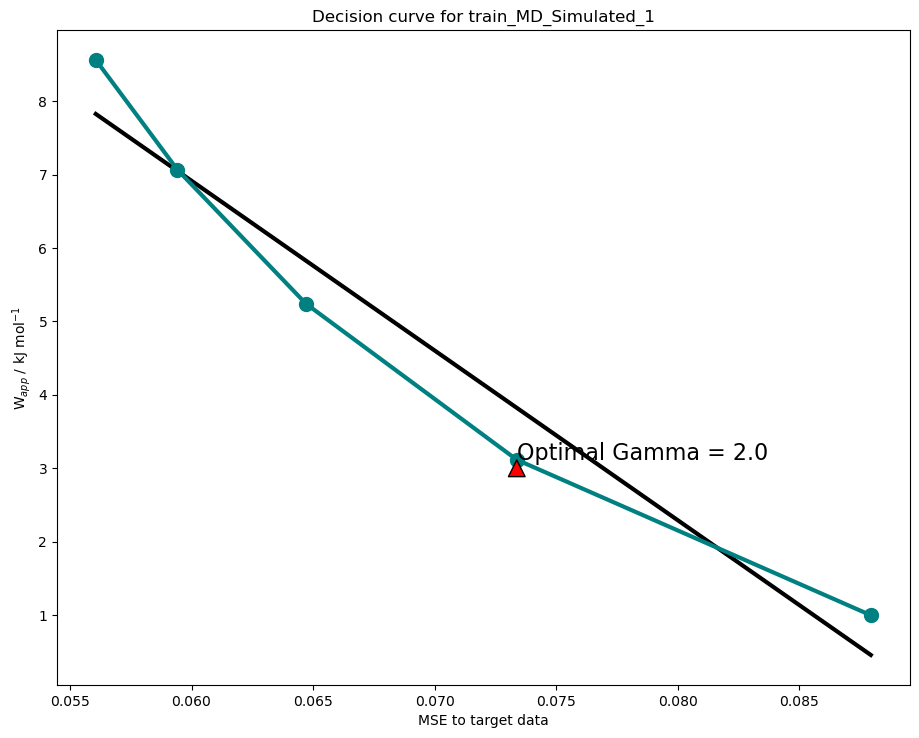

Optimal gamma for train_MD_Simulated_1 is 2.0x10^0
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1/reweighting_gamma_2x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_1/reweighting_gamma_2x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.13740  0.58730  0.99986  1.00000        0
1  0.16481  0.65986  0.99998  1.00000        1
2  0.00002  0.00012  0.00118  0.01402        2
3  0.00061  0.00366  0.03597  0.35574        3
4  0.73075  0.99961  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.13740  0.58730  0.99986  1.00000        0
1   0.16481  0.65986  0.99998  1.00000        1
2   0.00002  0.00012  0.00118  0.01402        2
3   0.00061  0.00366  0.03597  0.35574        3
4   0.73075  0.99961  1.00000  1.00000       

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


LogPf_by_res shape
(33,)
[ 5.97611404 13.67691114 12.94395346  6.16957057  4.52835868  5.8486698
  4.27287526  6.07074465  7.95270306  9.71235875  6.46712298 14.30457099
 18.15507884 20.17386963 15.05851116 15.97954545  2.2148824   5.65009133
 11.138029   10.50177551 14.6955455   9.20921184 11.235341    8.11599731
  8.10044745  8.43089238 14.67280759  9.48961344  9.1339312  14.1508275
  8.64040576  8.42520048 15.00484548]
LogPf_by_res [ 5.97611404 13.67691114 12.94395346  6.16957057  4.52835868  5.8486698
  4.27287526  6.07074465  7.95270306  9.71235875  6.46712298 14.30457099
 18.15507884 20.17386963 15.05851116 15.97954545  2.2148824   5.65009133
 11.138029   10.50177551 14.6955455   9.20921184 11.235341    8.11599731
  8.10044745  8.43089238 14.67280759  9.48961344  9.1339312  14.1508275
  8.64040576  8.42520048 15.00484548]
Pf_by_res [3.93906684e+02 8.70576697e+05 4.18299709e+05 4.77980804e+02
 9.26064397e+01 3.46772795e+02 7.17275746e+01 4.33002996e+02
 2.84325005e+03 1.65205238e+

/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_segs["calc_name"] = train_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_segs["calc_name"] = val_rep_name
/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:261: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-000_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-001_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-002_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-003_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-004_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-005_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-006_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-007_str1000.dcd /home/alexi/Documents/DESRES-Trajectory-bpti-protein/bpti-protein/bpti-protein-008_str1000.dcd /home/alexi/Docume

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis

Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_2/out__train_MD_Simulated_2Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 2
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_2/train_MD_Simulated_2_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_2
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_2/out__train_MD_Simulated_2Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_2 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 0.001, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_2'], 'kint_file': '/home/alexi/Documents/ValDX/data/test_f

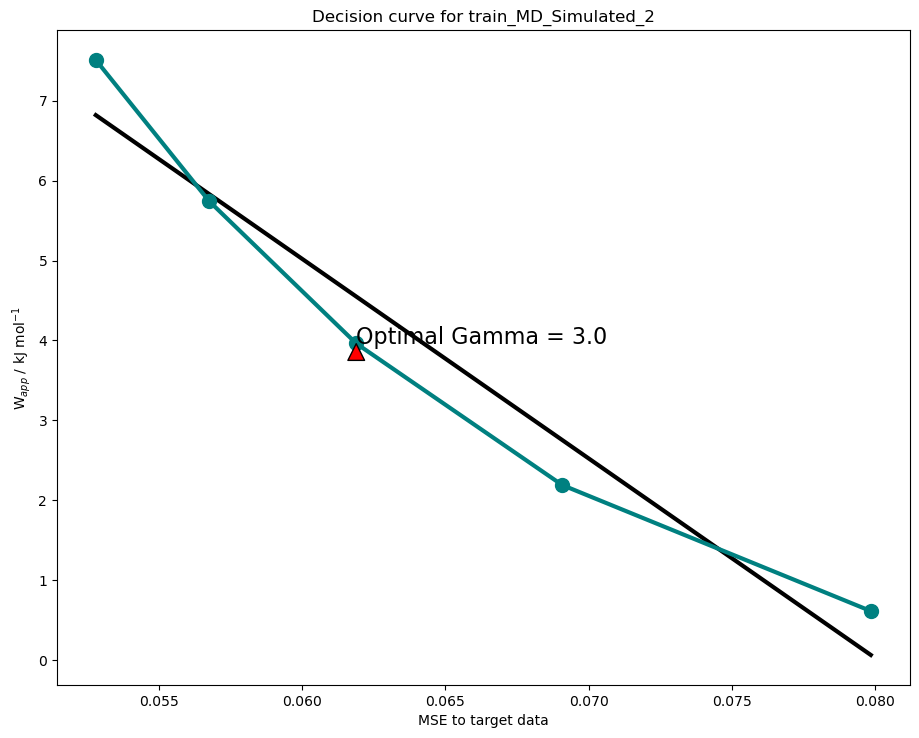

Optimal gamma for train_MD_Simulated_2 is 3.0x10^0
/home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_2/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14/train_MD_Simulated_2/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.08401  0.40872  0.99478  1.00000        0
1  0.18057  0.69653  0.99999  1.00000        1
2  0.56669  0.99331  1.00000  1.00000        2
3  0.01307  0.07576  0.54517  0.99992        3
4  0.00000  0.00001  0.00006  0.00075        4
      0.167      1.0     10.0    120.0  peptide
0   0.08401  0.40872  0.99478  1.00000        0
1   0.18057  0.69653  0.99999  1.00000        1
2   0.56669  0.99331  1.00000  1.00000        2
3   0.01307  0.07576  0.54517  0.99992        3
4   0.00000  0.00001  0.00006  0.00075       

/home/alexi/miniconda3/envs/HDXER_CUPY2/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


LogPf_by_res shape
(34,)
[13.09789557 12.81488183  8.36131139  5.97493218  4.62686188  5.82114216
  3.74228866  5.55835314 10.39987589  6.53093972 14.32699976 18.26145914
 15.07599673 15.9061988   8.42055706  5.77570161 11.30573604  8.95737721
 13.19825132 16.94720442 17.35509833 10.91786327  6.40842706  7.48127341
  7.69928797  8.23405949 11.74299851 10.1728516   9.18669071 15.33004454
 14.29427145  8.89091221  8.36470814 14.95483694]
LogPf_by_res [13.09789557 12.81488183  8.36131139  5.97493218  4.62686188  5.82114216
  3.74228866  5.55835314 10.39987589  6.53093972 14.32699976 18.26145914
 15.07599673 15.9061988   8.42055706  5.77570161 11.30573604  8.95737721
 13.19825132 16.94720442 17.35509833 10.91786327  6.40842706  7.48127341
  7.69928797  8.23405949 11.74299851 10.1728516   9.18669071 15.33004454
 14.29427145  8.89091221  8.36470814 14.95483694]
Pf_by_res [4.87914553e+05 3.67648218e+05 4.27830159e+03 3.93441418e+02
 1.02192867e+02 3.37357149e+02 4.21944485e+01 2.59395297e+02


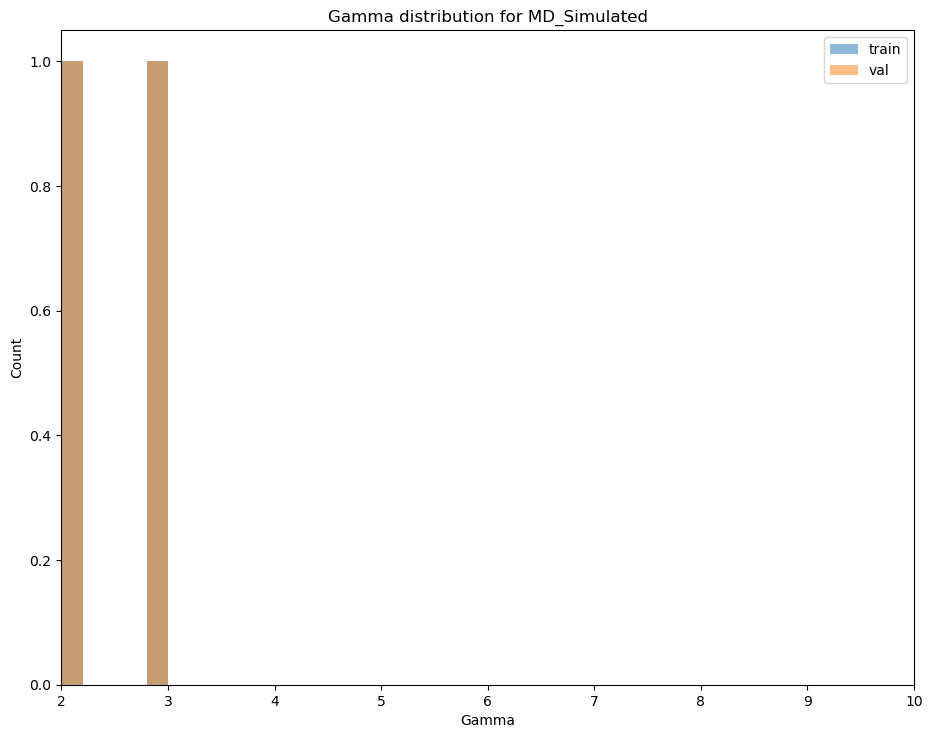

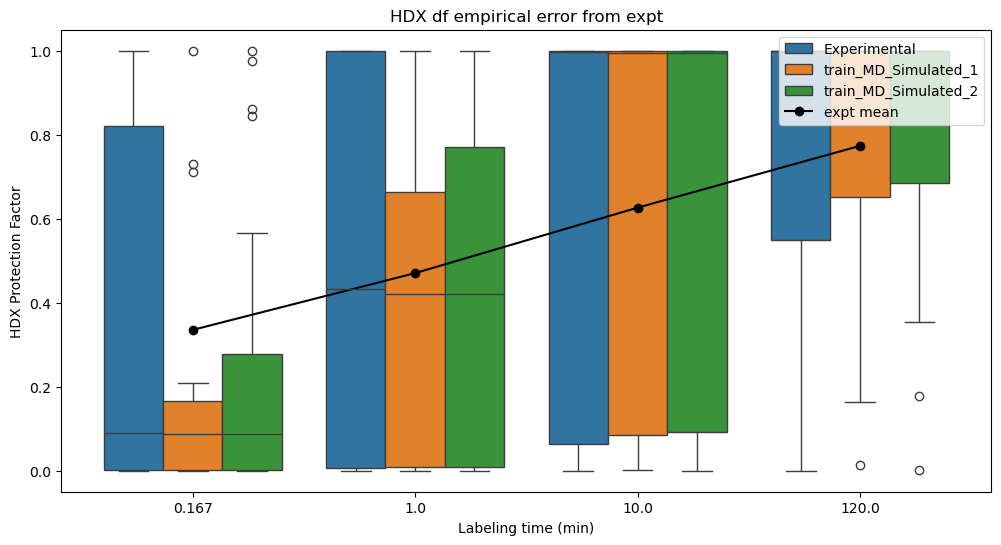

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.000239  0.001431  0.014196  0.154281       36  test_MD_Simulated_2   
201  0.022237  0.119452  0.477371  0.616586       37  test_MD_Simulated_2   
202  0.055680  0.288809  0.958697  1.000000       38  test_MD_Simulated_2   
203  0.033819  0.171600  0.503540  0.619695       39  test_MD_Simulated_2   
204  0.000797  0.004761  0.046332  0.410718       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

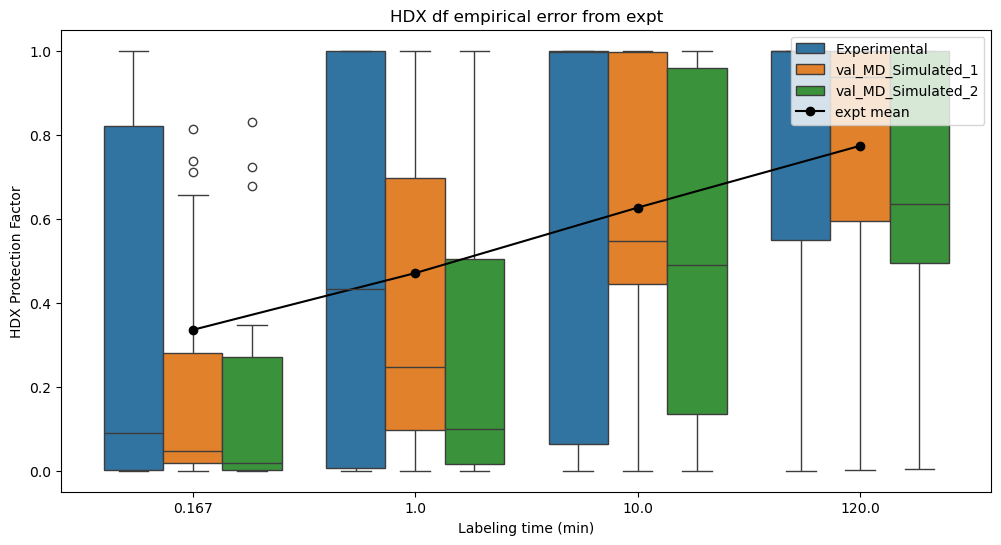

plot_dfracs_compare
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.000239  0.001431  0.014196  0.154281       36  test_MD_Simulated_2   
201  0.022237  0.119452  0.477371  0.616586       37  test_MD_Simulated_2   
202  0.055680  0.288809  0.958697  1.000000       38  test_MD_Simulated_2   
203  0.033819  0.171600  0.503540  0.619695       39  test_MD_Simulated_2   
204  0.000797  0.004761  0.046332  0.410718       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1

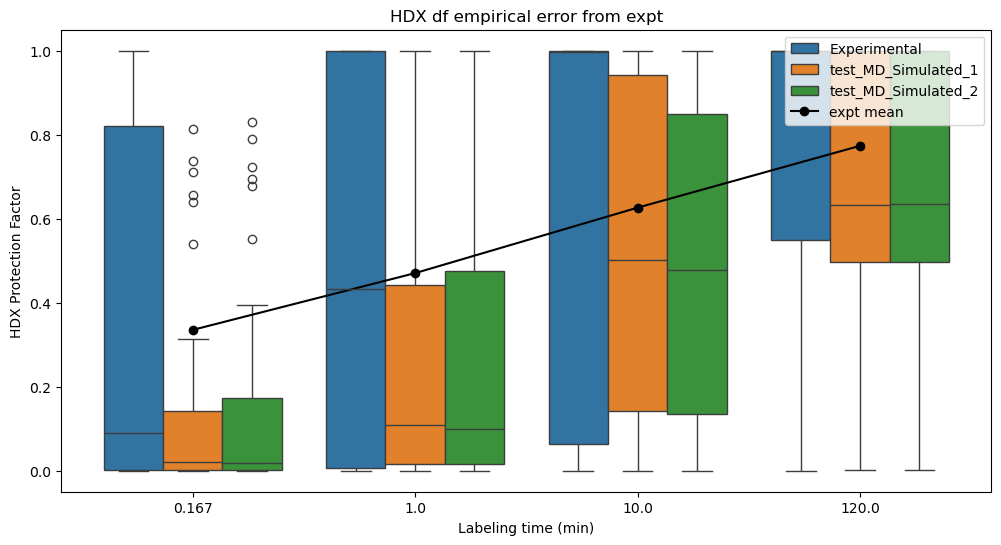

train_rep_names ['train_MD_Simulated_1', 'train_MD_Simulated_2']
val_rep_names ['val_MD_Simulated_1', 'val_MD_Simulated_2']
test_rep_names ['test_MD_Simulated_1', 'test_MD_Simulated_2']
train_rep_peptides [2, 3, 11, 13, 15, 19, 20, 22, 23, 24, 25, 26, 28, 29, 30, 33, 35, 36, 38, 40]
val_rep_peptides [0, 1, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 17, 18, 21, 27, 31, 32, 34, 37, 39]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
train_rep_peptides [0, 3, 7, 8, 12, 13, 16, 18, 19, 20, 21, 23, 24, 27, 29, 30, 32, 35, 37, 40]
val_rep_peptides [1, 2, 4, 5, 6, 9, 10, 11, 14, 15, 17, 22, 25, 26, 28, 31, 33, 34, 36, 38, 39]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
manual merge df
        0.167       1.0      10.0     120.0  peptide             cal

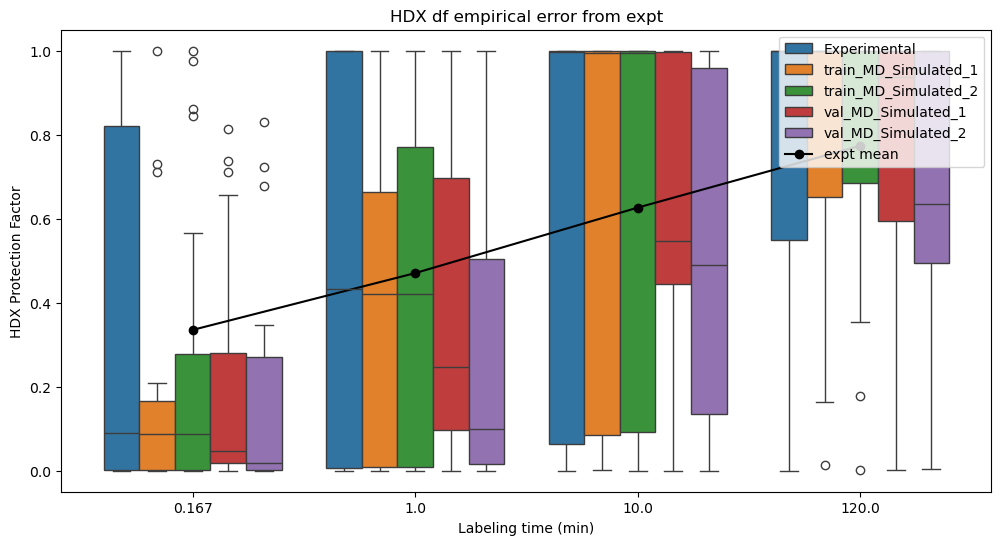

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.000239  0.001431  0.014196  0.154281       36  test_MD_Simulated_2   
201  0.022237  0.119452  0.477371  0.616586       37  test_MD_Simulated_2   
202  0.055680  0.288809  0.958697  1.000000       38  test_MD_Simulated_2   
203  0.033819  0.171600  0.503540  0.619695       39  test_MD_Simulated_2   
204  0.000797  0.004761  0.046332  0.410718       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

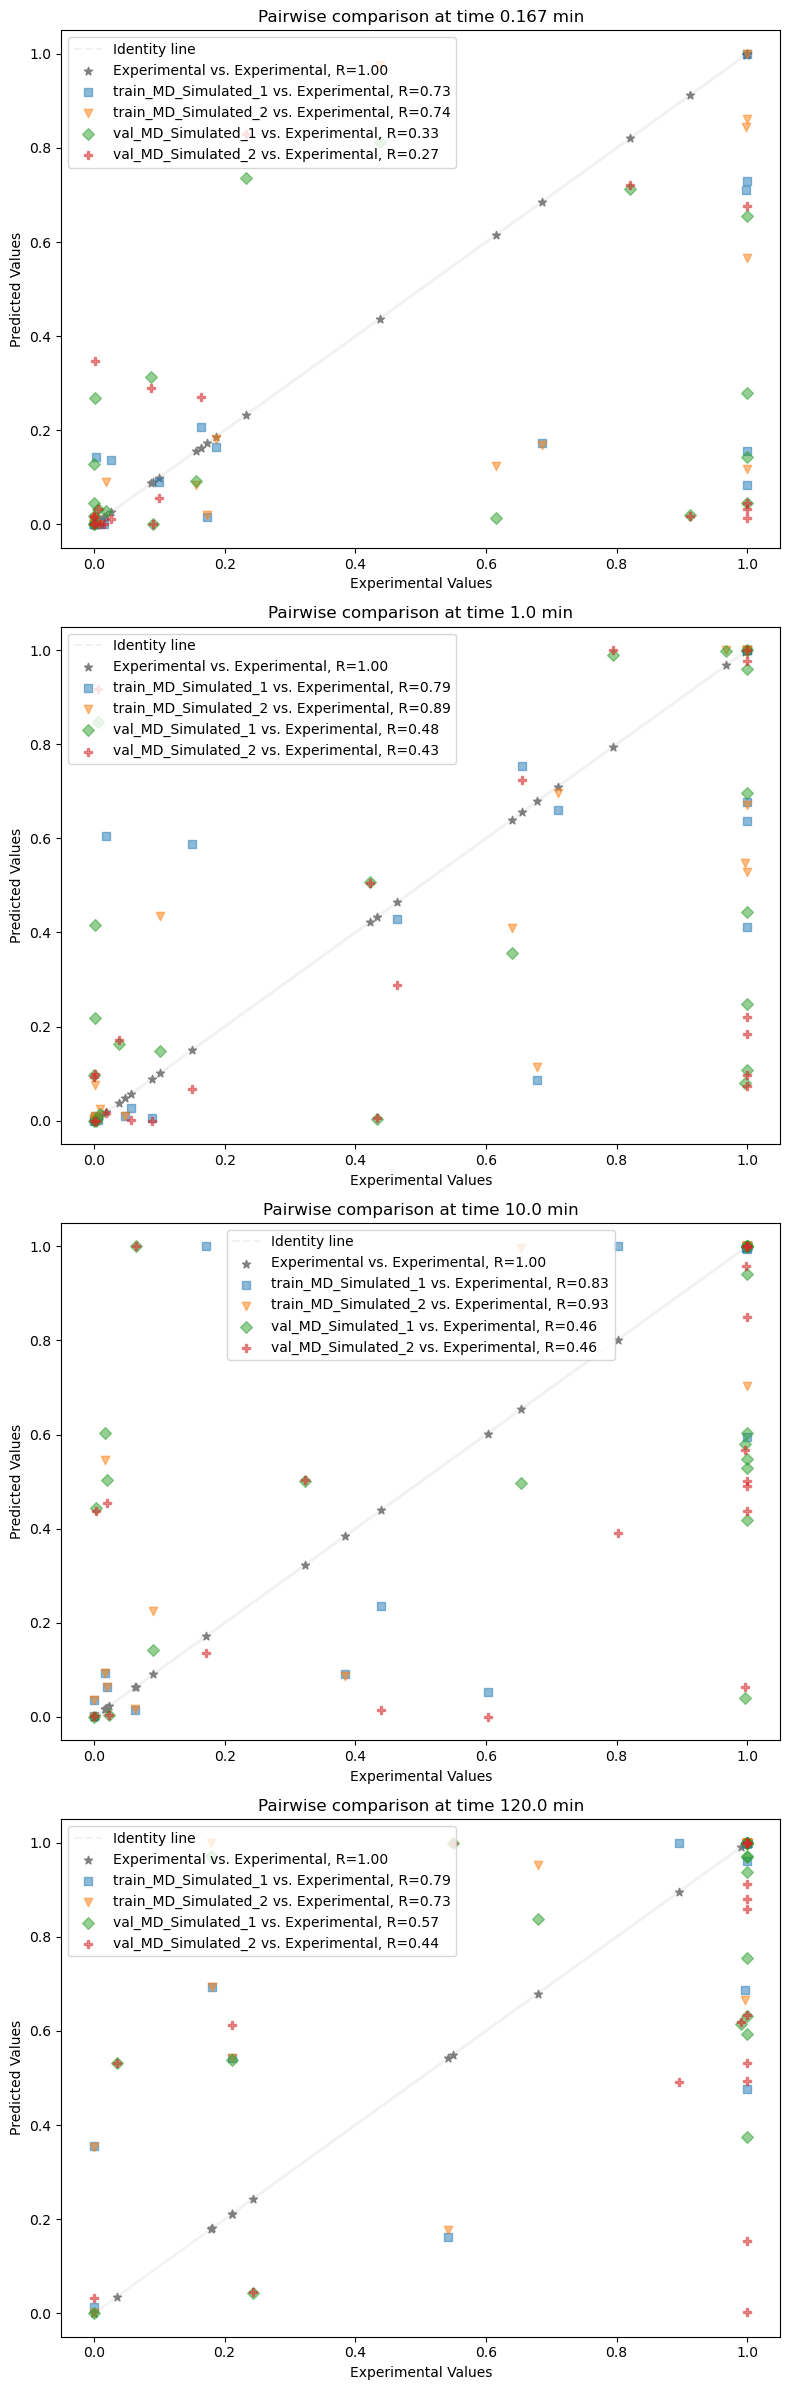

plotting paired errors
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.000239  0.001431  0.014196  0.154281       36  test_MD_Simulated_2   
201  0.022237  0.119452  0.477371  0.616586       37  test_MD_Simulated_2   
202  0.055680  0.288809  0.958697  1.000000       38  test_MD_Simulated_2   
203  0.033819  0.171600  0.503540  0.619695       39  test_MD_Simulated_2   
204  0.000797  0.004761  0.046332  0.410718       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN     NaN  NaN 

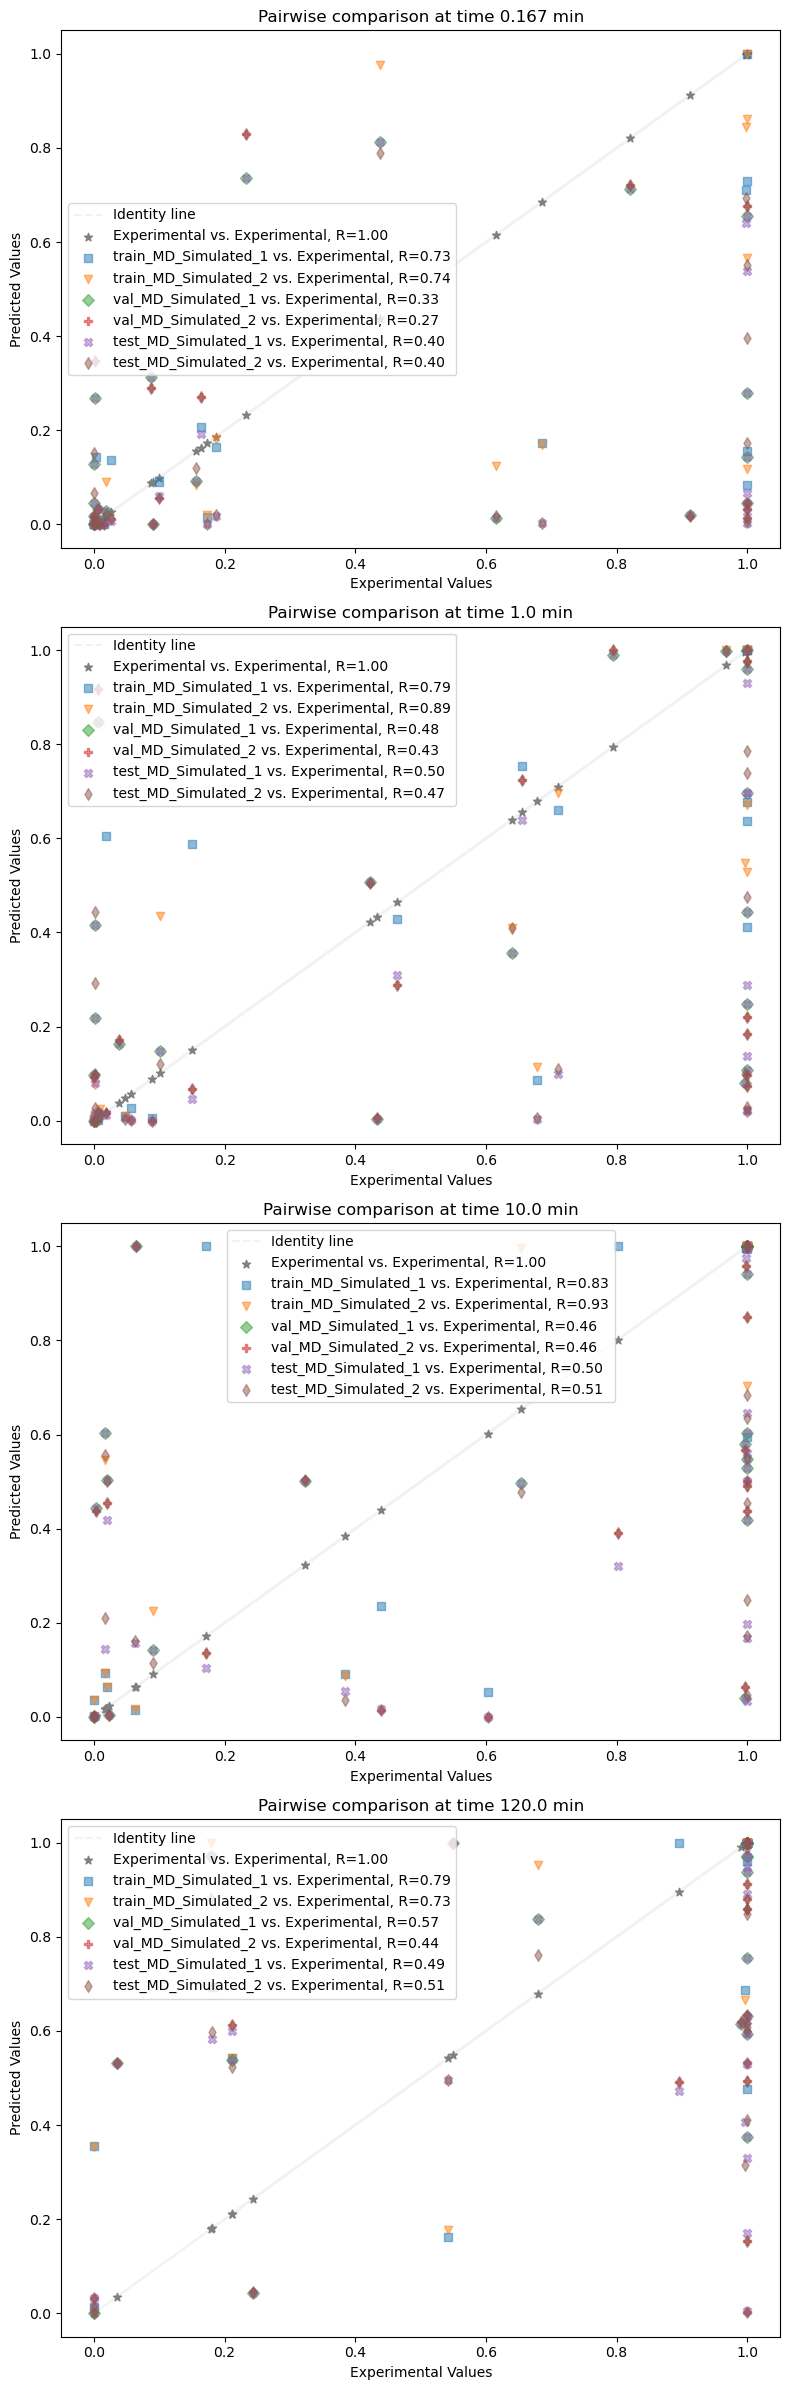

plotting paired trainval agreement
        0.167       1.0      10.0     120.0  peptide            calc_name  \
0    0.156690  0.639570  0.999960  1.000000        0         Experimental   
1    0.090390  0.432930  0.996560  1.000000        1         Experimental   
2    0.026650  0.149330  0.801570  1.000000        2         Experimental   
3    0.186800  0.710100  1.000000  1.000000        3         Experimental   
4    0.998800  1.000000  1.000000  1.000000        4         Experimental   
..        ...       ...       ...       ...      ...                  ...   
200  0.000239  0.001431  0.014196  0.154281       36  test_MD_Simulated_2   
201  0.022237  0.119452  0.477371  0.616586       37  test_MD_Simulated_2   
202  0.055680  0.288809  0.958697  1.000000       38  test_MD_Simulated_2   
203  0.033819  0.171600  0.503540  0.619695       39  test_MD_Simulated_2   
204  0.000797  0.004761  0.046332  0.410718       40  test_MD_Simulated_2   

     ResStr  ResEnd path  
0       NaN  

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1340: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1359: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"Time": t, "Type": "Train", "R": train_R})], ignore_index=True)


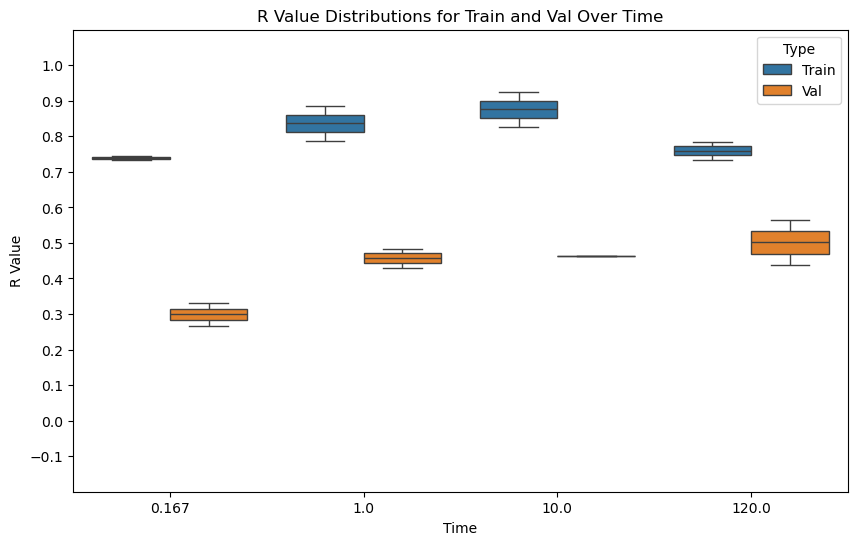

nan_df
        0.167       1.0      10.0     120.0  peptide             calc_name  \
0    0.137400  0.587300  0.999860  1.000000        2  train_MD_Simulated_1   
1    0.164810  0.659860  0.999980  1.000000        3  train_MD_Simulated_1   
2    0.000020  0.000120  0.001180  0.014020       11  train_MD_Simulated_1   
3    0.000610  0.003660  0.035970  0.355740       13  train_MD_Simulated_1   
4    0.730750  0.999610  1.000000  1.000000       15  train_MD_Simulated_1   
..        ...       ...       ...       ...      ...                   ...   
159  0.013212  0.074694  0.437951  0.858866       33    val_MD_Simulated_2   
160  0.033487  0.183486  0.850367  1.000000       34    val_MD_Simulated_2   
161  0.000239  0.001431  0.014196  0.154281       36    val_MD_Simulated_2   
162  0.055680  0.288809  0.958697  1.000000       38    val_MD_Simulated_2   
163  0.033819  0.171600  0.503540  0.619695       39    val_MD_Simulated_2   

     ResStr  ResEnd                                     

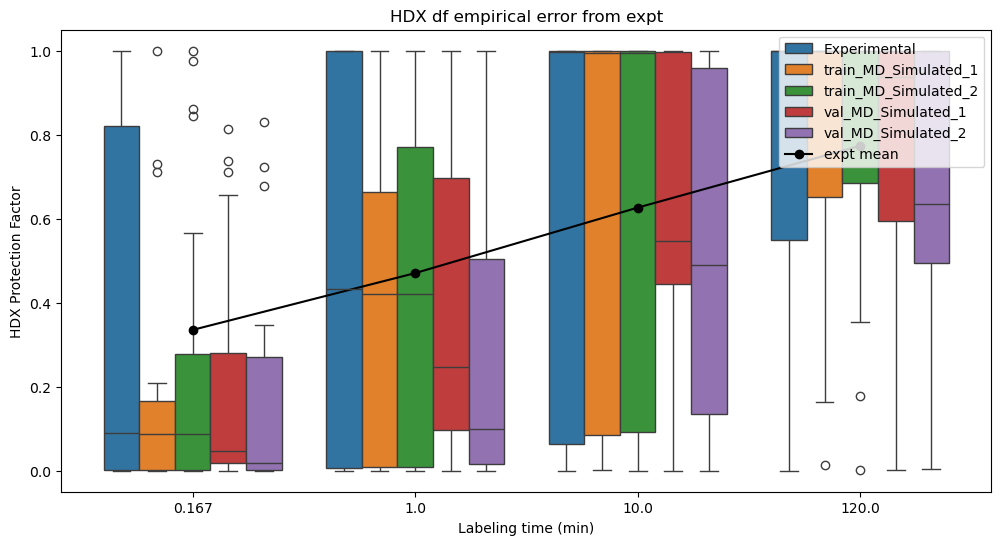

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.13740  0.58730  0.99986  1.00000        2  train_MD_Simulated_1   
1    0.16481  0.65986  0.99998  1.00000        3  train_MD_Simulated_1   
2    0.00002  0.00012  0.00118  0.01402       11  train_MD_Simulated_1   
3    0.00061  0.00366  0.03597  0.35574       13  train_MD_Simulated_1   
4    0.73075  0.99961  1.00000  1.00000       15  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

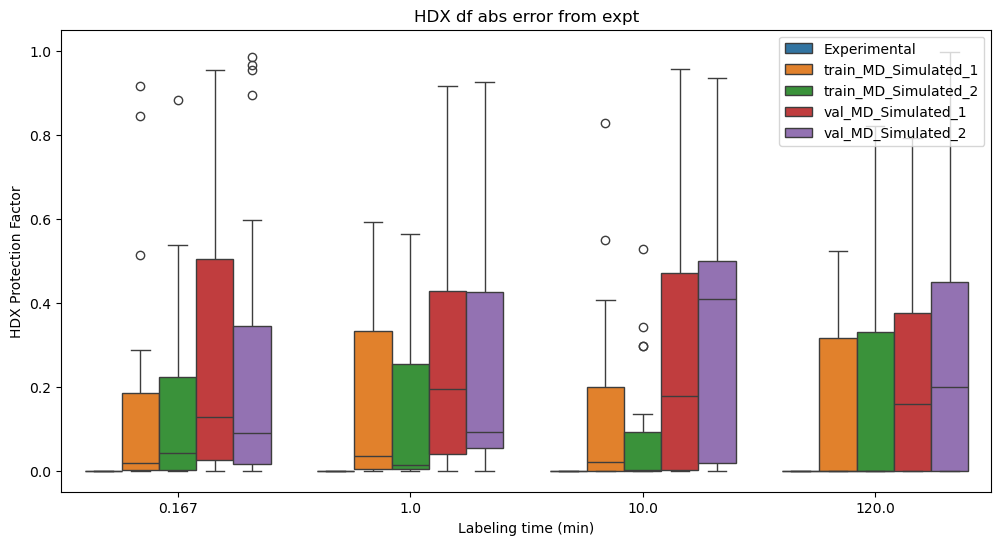

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.13740  0.58730  0.99986  1.00000        2  train_MD_Simulated_1   
1    0.16481  0.65986  0.99998  1.00000        3  train_MD_Simulated_1   
2    0.00002  0.00012  0.00118  0.01402       11  train_MD_Simulated_1   
3    0.00061  0.00366  0.03597  0.35574       13  train_MD_Simulated_1   
4    0.73075  0.99961  1.00000  1.00000       15  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2     

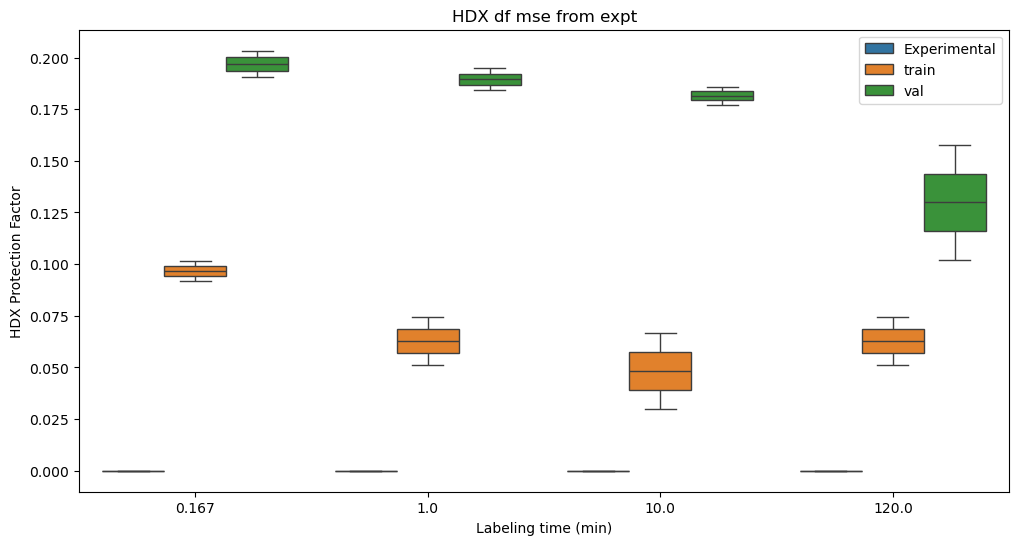

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name  \
0    0.13740  0.58730  0.99986  1.00000        2  train_MD_Simulated_1   
1    0.16481  0.65986  0.99998  1.00000        3  train_MD_Simulated_1   
2    0.00002  0.00012  0.00118  0.01402       11  train_MD_Simulated_1   
3    0.00061  0.00366  0.03597  0.35574       13  train_MD_Simulated_1   
4    0.73075  0.99961  1.00000  1.00000       15  train_MD_Simulated_1   
..       ...      ...      ...      ...      ...                   ...   
200  0.00963  0.05627  0.43963  0.99904       36          Experimental   
201  0.01757  0.10068  0.65396  1.00000       37          Experimental   
202  0.09888  0.46390  0.99804  1.00000       38          Experimental   
203  0.00650  0.03831  0.32339  0.99079       39          Experimental   
204  0.17259  0.67841  0.99999  1.00000       40          Experimental   

     ResStr  ResEnd path  
0       NaN     NaN  NaN  
1       NaN     NaN  NaN  
2      

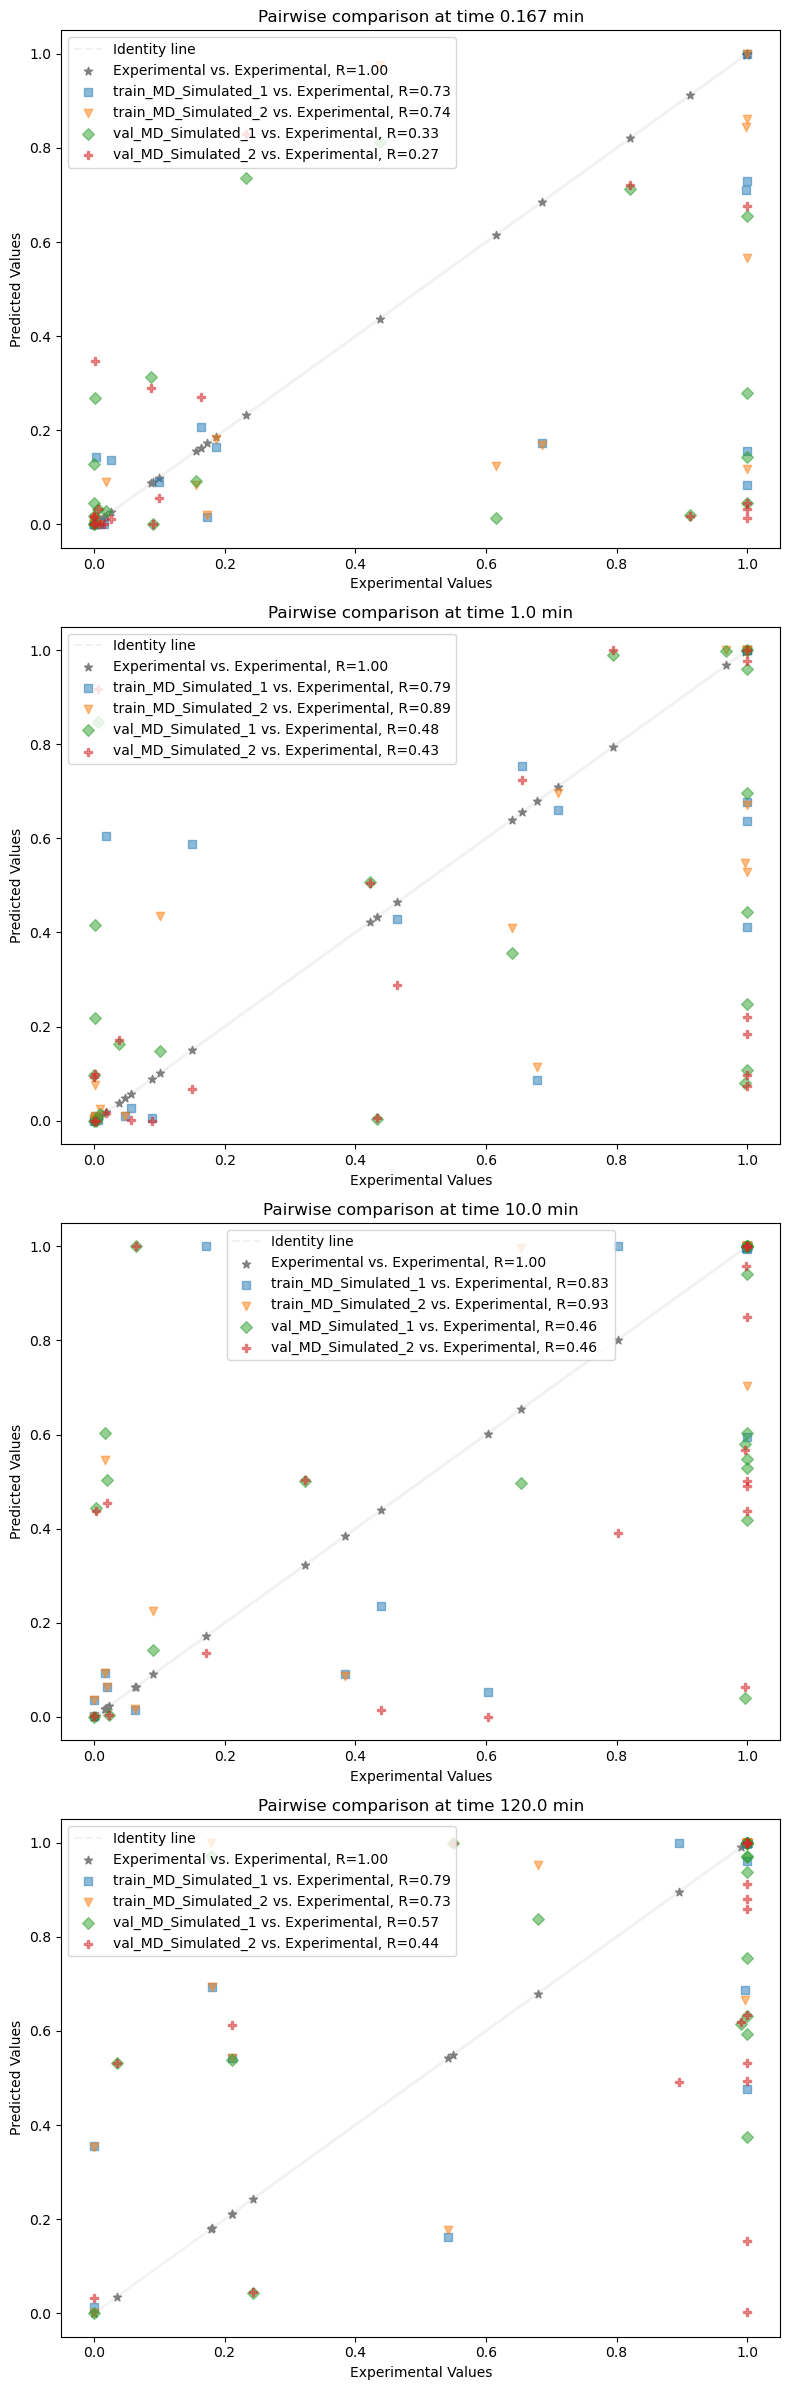

In [19]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [20]:
VDX.save_experiment()

dump = train_dfs, val_dfs, train_gammas, val_gammas

import pickle
with open(f'dump_{VDX.name}.pickle', 'wb') as f:
    print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    pickle.dump(dump, f)

Saving experiment to:  logs/test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14_1706566095.pkl
Saving pickle dump_test_full_actually0.5_celeste_stride100_413_5reps_bigEXPrange14.pickle


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:442: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [21]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings()
# settings.replicates = 3
# settings.gamma_range = (2,10)
# settings.train_frac = 0.8
# settings.RW_exponent = [0]
# settings.stride = 1000
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


In [ ]:
VDX = VDX.load_experiment(load_path='logs/test_full0.5_celeste_stride100_413_5reps_bigEXPrange6_1706046605.pkl')

In [ ]:
with open('dump_test_full0.5_celeste_stride100_413_5reps_bigEXPrange6.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()